 1. Importar Bibliotecas y Cargar Datos

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Definir la URL de los datos
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"

# Definir los nombres de las columnas según la descripción del conjunto de datos
column_names = [
    'mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
    'acceleration', 'model_year', 'origin', 'car_name'
]

# Leer los datos desde la URL
df = pd.read_csv(url, delim_whitespace=True, names=column_names, na_values='?')

# Mostrar las primeras filas del DataFrame
print(df.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model_year  origin                   car_name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  


### **PARTE 2**

Determinar la cantidad total de registros y de variables

In [ ]:
total_registros = df.shape[0]
total_atributos = df.shape[1]

# Mostrar la información
print(f"Total de registros: {total_registros}")
print(f"Total de variables (atributos): {total_atributos}")

Total de registros: 398
Total de variables (atributos): 9


Determinar los tipos de datos por cada variable

In [ ]:
tipos_de_datos = df.dtypes

# Mostrar los tipos de datos
print(tipos_de_datos)

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object


Eliminar la columna 'car_name' y sustituir los datos faltantes por la media respectiva

In [ ]:
# Eliminar la columna 'car_name'
df = df.drop(columns=['car_name'])

# Sustituir los datos faltantes por la media de cada columna
df = df.fillna(df.mean())

# Mostrar las primeras filas del DataFrame para verificar
print(df.head())

# Verificar que no hay datos faltantes
print(df.isnull().sum())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model_year  origin  
0          70       1  
1          70       1  
2          70       1  
3          70       1  
4          70       1  
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
dtype: int64


### **PARTE 3**

Generar una matriz de correlación a través de un mapa de calor de todas las variables.

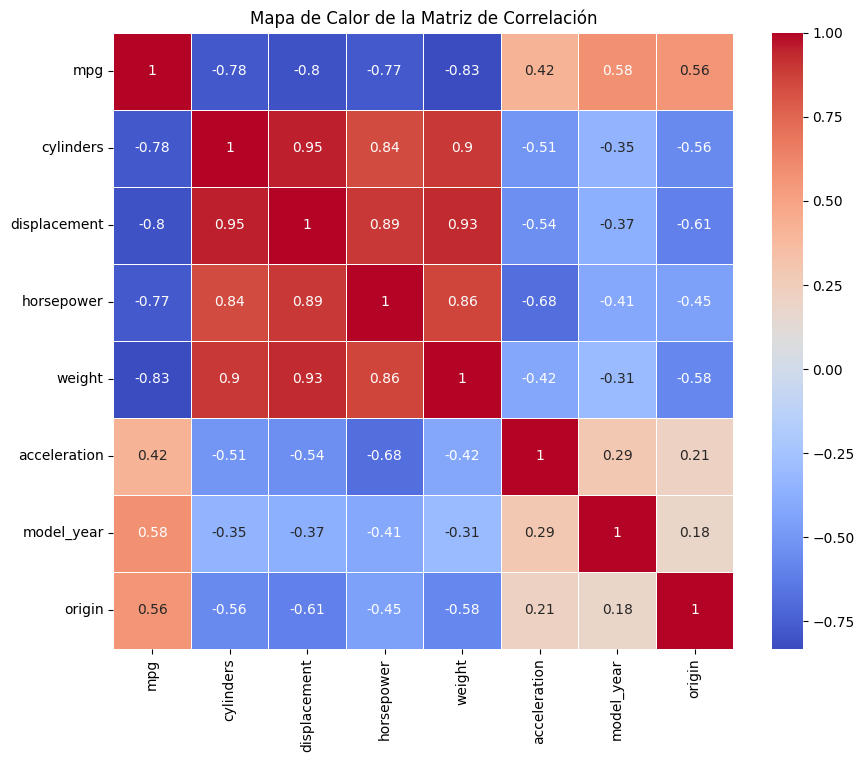

In [ ]:
correlation_matrix = df.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de la Matriz de Correlación')
plt.show()

Tomando como variable dependiente la columna 'mpg', determine las tres (3) variables que
presenten una mayor correlación (positiva o negativa), con dicha variable dependiente (mpg).

In [ ]:
# Ordenar las correlaciones con 'mpg' y obtener las tres mayores (absolutas)
correlation_with_mpg = correlation_matrix['mpg'].abs().sort_values(ascending=False)
top_3_correlations = correlation_with_mpg.index[1:4]

# Mostrar las tres variables con mayor correlación con 'mpg'
print("Las tres variables con mayor correlación con 'mpg' son:")
for variable in top_3_correlations:
    print(f"{variable}: {correlation_matrix['mpg'][variable]}")

Las tres variables con mayor correlación con 'mpg' son:
weight: -0.8317409332443344
displacement: -0.8042028248058979
cylinders: -0.7753962854205539


Elegir estas tres (3) variables como independientes y generar los conjuntos de datos (dataframe) para cada una de estas variables y para la variable dependiente.

In [ ]:
top_3_correlations = correlation_matrix['mpg'].abs().sort_values(ascending=False).index[1:4]

# Crear dataframes para cada una de las tres variables independientes con 'mpg'
df_independiente = df[top_3_correlations]
df_dependiente = df[['mpg']]

# Mostrar las tres variables con mayor correlación con 'mpg'
print("Las tres variables con mayor correlación con 'mpg' son:")
for variable in top_3_correlations:
    print(f"{variable}: {correlation_matrix['mpg'][variable]}")

# Mostrar los primeros registros de los dataframes creados
print("\nDataFrame de variables independientes:")
print(df_independiente.head())

print("\nDataFrame de la variable dependiente 'mpg':")
print(df_dependiente.head())

Las tres variables con mayor correlación con 'mpg' son:
weight: -0.8317409332443344
displacement: -0.8042028248058979
cylinders: -0.7753962854205539

DataFrame de variables independientes:
   weight  displacement  cylinders
0  3504.0         307.0          8
1  3693.0         350.0          8
2  3436.0         318.0          8
3  3433.0         304.0          8
4  3449.0         302.0          8

DataFrame de la variable dependiente 'mpg':
    mpg
0  18.0
1  15.0
2  18.0
3  16.0
4  17.0


### **PARTE 4**

Determinar los conjuntos de entrenamiento y prueba para cada una de las variables
independientes y dependiente.

In [ ]:
independent_variables = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin']

# Variable dependiente (target)
dependent_variable = 'mpg'

# Dividir los datos en conjuntos de entrenamiento y prueba para cada variable
train_test_sets = {}
for var in [dependent_variable] + independent_variables:
    X = df.drop(columns=[var])  # Variables independientes
    y = df[var]  # Variable dependiente

    # Dividir en 70% entrenamiento y 30% prueba, fijando la semilla para reproducibilidad
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Guardar los conjuntos de entrenamiento y prueba en un diccionario
    train_test_sets[var] = {
        'X_train': X_train,
        'X_test': X_test,
        'y_train': y_train,
        'y_test': y_test
    }

# Mostrar la forma de los conjuntos de entrenamiento y prueba para cada variable
for var, data in train_test_sets.items():
    print(f"Variable: {var}")
    print(f"X_train shape: {data['X_train'].shape}, y_train shape: {data['y_train'].shape}")
    print(f"X_test shape: {data['X_test'].shape}, y_test shape: {data['y_test'].shape}")
    print("---------------------")

# Ejemplo de acceso a los conjuntos de entrenamiento y prueba para 'mpg'
print("\nEjemplo de acceso a los conjuntos de entrenamiento y prueba para 'mpg':")
print("X_train:")
print(train_test_sets['mpg']['X_train'].head())
print("y_train:")
print(train_test_sets['mpg']['y_train'].head())

Variable: mpg
X_train shape: (278, 7), y_train shape: (278,)
X_test shape: (120, 7), y_test shape: (120,)
---------------------
Variable: cylinders
X_train shape: (278, 7), y_train shape: (278,)
X_test shape: (120, 7), y_test shape: (120,)
---------------------
Variable: displacement
X_train shape: (278, 7), y_train shape: (278,)
X_test shape: (120, 7), y_test shape: (120,)
---------------------
Variable: horsepower
X_train shape: (278, 7), y_train shape: (278,)
X_test shape: (120, 7), y_test shape: (120,)
---------------------
Variable: weight
X_train shape: (278, 7), y_train shape: (278,)
X_test shape: (120, 7), y_test shape: (120,)
---------------------
Variable: acceleration
X_train shape: (278, 7), y_train shape: (278,)
X_test shape: (120, 7), y_test shape: (120,)
---------------------
Variable: model_year
X_train shape: (278, 7), y_train shape: (278,)
X_test shape: (120, 7), y_test shape: (120,)
---------------------
Variable: origin
X_train shape: (278, 7), y_train shape: (278,)

### **PARTE 5**

Crear un modelo de regresión lineal simple para cada variable independiente elegida.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

independent_variables = ['cylinders', 'displacement', 'weight']

# Iterar sobre cada variable independiente y crear un modelo de regresión lineal simple
for var in independent_variables:
    # Dividir los datos en entrenamiento y prueba para la variable seleccionada
    X = df[[var]]
    y = df['mpg']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Crear el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Hacer predicciones sobre los datos de prueba
    y_pred = model.predict(X_test)

    # Calcular métricas de evaluación
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Mostrar resultados
    print(f"Variable independiente: {var}")
    print(f"Coeficiente de regresión: {model.coef_[0]}")
    print(f"Intercepto: {model.intercept_}")
    print(f"Error cuadrático medio (MSE): {mse}")
    print(f"Coeficiente de determinación (R^2): {r2}")
    print("-----------------------------------------")

Variable independiente: cylinders
Coeficiente de regresión: -3.613186853563097
Intercepto: 43.202316609409735
Error cuadrático medio (MSE): 21.14641413807428
Coeficiente de determinación (R^2): 0.6315401359163677
-----------------------------------------
Variable independiente: displacement
Coeficiente de regresión: -0.062494306525470986
Intercepto: 35.597521615688834
Error cuadrático medio (MSE): 20.02462239911002
Coeficiente de determinación (R^2): 0.651086486847077
-----------------------------------------
Variable independiente: weight
Coeficiente de regresión: -0.007844075292500058
Intercepto: 46.937285074326375
Error cuadrático medio (MSE): 15.821924228587429
Coeficiente de determinación (R^2): 0.7243152426344307
-----------------------------------------


### **PARTE 6**

Utilizando las tres variables independientes elegidas crear un modelo de regresión lineal múltiple.

In [ ]:
independent_variables = ['cylinders', 'displacement', 'weight']

# Variable dependiente (target)
dependent_variable = 'mpg'

# Dividir los datos en entrenamiento y prueba
X = df[independent_variables]
y = df[dependent_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo de regresión lineal múltiple
model = LinearRegression()
model.fit(X_train, y_train)

# Hacer predicciones sobre los datos de prueba
y_pred = model.predict(X_test)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar resultados
print("Modelo de Regresión Lineal Múltiple")
print("Coeficientes de regresión:", model.coef_)
print("Intercepto:", model.intercept_)
print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)
print("-----------------------------------------")

Modelo de Regresión Lineal Múltiple
Coeficientes de regresión: [ 0.1166258  -0.0237051  -0.00537314]
Intercepto: 43.50894296922284
Error cuadrático medio (MSE): 16.473882082080067
Coeficiente de determinación (R^2): 0.7129553827301628
-----------------------------------------


### **PARTE 7**

Evaluar los tres modelos de regresión lineal simple y el modelo de regresión lineal múltiple utilizando las siguientes métricas: Error Absoluto Medio (MAE), Error Cuadrático Medio (MSE) y Raíz del Error Cuadrático Medio (RMSE)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

independent_variables = ['cylinders', 'displacement', 'weight']

# Variable dependiente (target)
dependent_variable = 'mpg'

# Diccionario para almacenar los resultados de las evaluaciones
evaluation_results = {}

# Crear y evaluar modelos de regresión lineal simple
for var in independent_variables:
    X = df[[var]]
    y = df[dependent_variable]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    evaluation_results[var] = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse
    }

# Crear y evaluar el modelo de regresión lineal múltiple
X = df[independent_variables]
y = df[dependent_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

evaluation_results['multiple_regression'] = {
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse
}

# Mostrar resultados
for var, metrics in evaluation_results.items():
    print(f"Modelo de Regresión {'Múltiple' if var == 'multiple_regression' else f'Simple ({var})'}")
    print(f"MAE: {metrics['MAE']}")
    print(f"MSE: {metrics['MSE']}")
    print(f"RMSE: {metrics['RMSE']}")
    print("-----------------------------------------")

Modelo de Regresión Simple (cylinders)
MAE: 3.649574277858407
MSE: 21.14641413807428
RMSE: 4.598523038767369
-----------------------------------------
Modelo de Regresión Simple (displacement)
MAE: 3.600652099807516
MSE: 20.02462239911002
RMSE: 4.474887976152031
-----------------------------------------
Modelo de Regresión Simple (weight)
MAE: 3.223974936798422
MSE: 15.821924228587429
RMSE: 3.977678245985644
-----------------------------------------
Modelo de Regresión Múltiple
MAE: 3.29516458293112
MSE: 16.473882082080067
RMSE: 4.058803035635021
-----------------------------------------


### **PARTE 8**

Elegir el mejor de los modelos de regresión (con base en las métricas de evaluación) y utilizarlo para predecir el valor de la variable dependiente.

In [ ]:
independent_variables = ['cylinders', 'displacement', 'weight']

# Variable dependiente (target)
dependent_variable = 'mpg'

# Diccionario para almacenar los resultados de las evaluaciones
evaluation_results = {}

# Crear y evaluar modelos de regresión lineal simple
for var in independent_variables:
    X = df[[var]]
    y = df[dependent_variable]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    evaluation_results[var] = {
        'model': model,
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'X_test': X_test,
        'y_test': y_test,
        'y_pred': y_pred
    }

# Crear y evaluar el modelo de regresión lineal múltiple
X = df[independent_variables]
y = df[dependent_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

evaluation_results['multiple_regression'] = {
    'model': model,
    'MAE': mae,
    'MSE': mse,
    'RMSE': rmse,
    'X_test': X_test,
    'y_test': y_test,
    'y_pred': y_pred
}

# Mostrar resultados y encontrar el mejor modelo
best_model_key = None
best_rmse = float('inf')

for var, metrics in evaluation_results.items():
    print(f"Modelo de Regresión {'Múltiple' if var == 'multiple_regression' else f'Simple ({var})'}")
    print(f"MAE: {metrics['MAE']}")
    print(f"MSE: {metrics['MSE']}")
    print(f"RMSE: {metrics['RMSE']}")
    print("-----------------------------------------")

    if metrics['RMSE'] < best_rmse:
        best_rmse = metrics['RMSE']
        best_model_key = var

# Seleccionar el mejor modelo
best_model = evaluation_results[best_model_key]['model']

print(f"\nEl mejor modelo es el de {'regresión múltiple' if best_model_key == 'multiple_regression' else f'regresión simple ({best_model_key})'} con RMSE = {best_rmse}")

# Ejemplo de predicción usando el mejor modelo
# Usar el conjunto de prueba del mejor modelo
X_test_best = evaluation_results[best_model_key]['X_test']
y_test_best = evaluation_results[best_model_key]['y_test']
y_pred_best = evaluation_results[best_model_key]['y_pred']

print("\nEjemplo de predicciones usando el mejor modelo:")
print("Predicciones:", y_pred_best[:5])
print("Valores reales:", y_test_best[:5].values)

Modelo de Regresión Simple (cylinders)
MAE: 3.649574277858407
MSE: 21.14641413807428
RMSE: 4.598523038767369
-----------------------------------------
Modelo de Regresión Simple (displacement)
MAE: 3.600652099807516
MSE: 20.02462239911002
RMSE: 4.474887976152031
-----------------------------------------
Modelo de Regresión Simple (weight)
MAE: 3.223974936798422
MSE: 15.821924228587429
RMSE: 3.977678245985644
-----------------------------------------
Modelo de Regresión Múltiple
MAE: 3.29516458293112
MSE: 16.473882082080067
RMSE: 4.058803035635021
-----------------------------------------

El mejor modelo es el de regresión simple (weight) con RMSE = 3.977678245985644

Ejemplo de predicciones usando el mejor modelo:
Predicciones: [32.85716992 26.34658743 26.27599075 16.03162842 13.70193806]
Valores reales: [33. 28. 19. 13. 14.]


Genere nuevos datos para la o las variables independientes y utilice el modelo para predecir el valor de la variable dependiente.

In [ ]:
new_data_simple = pd.DataFrame({
    'cylinders': [4, 6, 8],
    'displacement': [150.0, 200.0, 300.0],
    'weight': [2500, 3000, 4000]
})

# Utilizar el mejor modelo para predecir los nuevos datos
if best_model_key == 'multiple_regression':
    new_data = new_data_simple[independent_variables]  # Usar todas las variables independientes
else:
    new_data = new_data_simple[[best_model_key]]  # Usar solo la variable independiente del mejor modelo simple

# Predecir con el mejor modelo
predictions = best_model.predict(new_data)

print("Nuevos datos para predicción:")
print(new_data)
print("\nPredicciones de 'mpg' para los nuevos datos:")
print(predictions)

Nuevos datos para predicción:
   weight
0    2500
1    3000
2    4000

Predicciones de 'mpg' para los nuevos datos:
[27.32709684 23.4050592  15.5609839 ]
